In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.linear_model as lm

In [55]:
from xgboost import XGBRegressor

In [56]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [57]:
test.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Average_Price_per_ProductType
0,FDY57,CHUKWUDI013,FDY57_CHUKWUDI013,20.20,Normal Fat,0.121153,Snack Foods,243.44,1994,High,Cluster 3,Supermarket Type1,395.352190
1,FDY10,CHUKWUDI018,FDY10_CHUKWUDI018,17.60,Low Fat,0.049268,Snack Foods,282.54,2016,Medium,Cluster 3,Supermarket Type2,395.352190
2,FDO40,CHUKWUDI018,FDO40_CHUKWUDI018,17.10,Low Fat,0.032761,Frozen Foods,372.10,2016,Medium,Cluster 3,Supermarket Type2,388.071094
3,NCQ43,CHUKWUDI018,NCQ43_CHUKWUDI018,17.75,Low Fat,0.000000,Others,271.73,2016,Medium,Cluster 3,Supermarket Type2,388.607700
4,NCC07,CHUKWUDI046,NCC07_CHUKWUDI046,19.60,Low Fat,0.023951,Household,264.24,2004,Small,Cluster 1,Supermarket Type1,399.999418


In [58]:
train.shape

(2994, 14)

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product_Identifier              1996 non-null   object 
 1   Supermarket_Identifier          1996 non-null   object 
 2   Product_Supermarket_Identifier  1996 non-null   object 
 3   Product_Weight                  1667 non-null   float64
 4   Product_Fat_Content             1996 non-null   object 
 5   Product_Shelf_Visibility        1996 non-null   float64
 6   Product_Type                    1996 non-null   object 
 7   Product_Price                   1996 non-null   float64
 8   Supermarket_Opening_Year        1996 non-null   int64  
 9   Supermarket _Size               1430 non-null   object 
 10  Supermarket_Location_Type       1996 non-null   object 
 11  Supermarket_Type                1996 non-null   object 
 12  Average_Price_per_ProductType   19

In [60]:
#filling null values
#train['Product_Weight'] = train['Product_Weight'].fillna(train['Product_Weight'].mean())`

In [61]:
train.Product_Weight = train.Product_Weight.fillna(train.Product_Weight.mean())
test.Product_Weight = test.Product_Weight.fillna(test.Product_Weight.mean())

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product_Identifier              2994 non-null   object 
 1   Supermarket_Identifier          2994 non-null   object 
 2   Product_Supermarket_Identifier  2994 non-null   object 
 3   Product_Weight                  2994 non-null   float64
 4   Product_Fat_Content             2994 non-null   object 
 5   Product_Shelf_Visibility        2994 non-null   float64
 6   Product_Type                    2994 non-null   object 
 7   Product_Price                   2994 non-null   float64
 8   Supermarket_Opening_Year        2994 non-null   int64  
 9   Supermarket _Size               2110 non-null   object 
 10  Supermarket_Location_Type       2994 non-null   object 
 11  Supermarket_Type                2994 non-null   object 
 12  Average_Price_per_ProductType   29

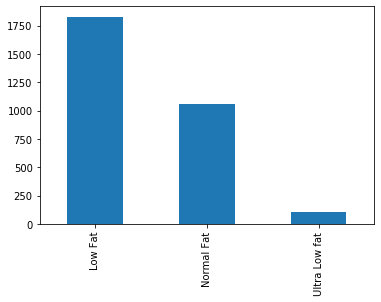

In [63]:
train['Product_Fat_Content'].value_counts().plot.bar()

In [64]:
train['Product_Fat_Content'].value_counts()

Low Fat          1829
Normal Fat       1057
Ultra Low fat     108
Name: Product_Fat_Content, dtype: int64

In [65]:
test['Supermarket _Size'] = test['Supermarket _Size'].replace({ np.nan : "Medium"})
train['Supermarket _Size'] = train['Supermarket _Size'].replace({ np.nan : "Medium"})

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product_Identifier              2994 non-null   object 
 1   Supermarket_Identifier          2994 non-null   object 
 2   Product_Supermarket_Identifier  2994 non-null   object 
 3   Product_Weight                  2994 non-null   float64
 4   Product_Fat_Content             2994 non-null   object 
 5   Product_Shelf_Visibility        2994 non-null   float64
 6   Product_Type                    2994 non-null   object 
 7   Product_Price                   2994 non-null   float64
 8   Supermarket_Opening_Year        2994 non-null   int64  
 9   Supermarket _Size               2994 non-null   object 
 10  Supermarket_Location_Type       2994 non-null   object 
 11  Supermarket_Type                2994 non-null   object 
 12  Average_Price_per_ProductType   29

In [67]:
test['Supermarket _Size'].value_counts()

Medium    1207
Small      552
High       237
Name: Supermarket _Size, dtype: int64

In [68]:
test['Supermarket _Size']=test['Supermarket _Size'].map({'Small':1,'Medium':2,'High':3})

train['Supermarket _Size']=train['Supermarket _Size'].map({'Small':1,'Medium':2,'High':3})


In [69]:
test.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Average_Price_per_ProductType
0,FDY57,CHUKWUDI013,FDY57_CHUKWUDI013,20.20,Normal Fat,0.121153,Snack Foods,243.44,1994,3,Cluster 3,Supermarket Type1,395.352190
1,FDY10,CHUKWUDI018,FDY10_CHUKWUDI018,17.60,Low Fat,0.049268,Snack Foods,282.54,2016,2,Cluster 3,Supermarket Type2,395.352190
2,FDO40,CHUKWUDI018,FDO40_CHUKWUDI018,17.10,Low Fat,0.032761,Frozen Foods,372.10,2016,2,Cluster 3,Supermarket Type2,388.071094
3,NCQ43,CHUKWUDI018,NCQ43_CHUKWUDI018,17.75,Low Fat,0.000000,Others,271.73,2016,2,Cluster 3,Supermarket Type2,388.607700
4,NCC07,CHUKWUDI046,NCC07_CHUKWUDI046,19.60,Low Fat,0.023951,Household,264.24,2004,1,Cluster 1,Supermarket Type1,399.999418


In [70]:
test['Product_Fat_Content']=test['Product_Fat_Content'].map({'Ultra Low Fat':1,'Low Fat':2,'Normal Fat':3})

train['Product_Fat_Content']=train['Product_Fat_Content'].map({'Ultra Low Fat':1,'Low Fat':2,'Normal Fat':3})


In [71]:
test.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Average_Price_per_ProductType
0,FDY57,CHUKWUDI013,FDY57_CHUKWUDI013,20.20,3.0,0.121153,Snack Foods,243.44,1994,3,Cluster 3,Supermarket Type1,395.352190
1,FDY10,CHUKWUDI018,FDY10_CHUKWUDI018,17.60,2.0,0.049268,Snack Foods,282.54,2016,2,Cluster 3,Supermarket Type2,395.352190
2,FDO40,CHUKWUDI018,FDO40_CHUKWUDI018,17.10,2.0,0.032761,Frozen Foods,372.10,2016,2,Cluster 3,Supermarket Type2,388.071094
3,NCQ43,CHUKWUDI018,NCQ43_CHUKWUDI018,17.75,2.0,0.000000,Others,271.73,2016,2,Cluster 3,Supermarket Type2,388.607700
4,NCC07,CHUKWUDI046,NCC07_CHUKWUDI046,19.60,2.0,0.023951,Household,264.24,2004,1,Cluster 1,Supermarket Type1,399.999418


In [72]:
test['Supermarket_Type'].value_counts()

Supermarket Type1    1315
Grocery Store         297
Supermarket Type2     202
Supermarket Type3     182
Name: Supermarket_Type, dtype: int64

In [73]:
test = pd.get_dummies(test, prefix_sep="_", columns=['Product_Type','Supermarket_Location_Type','Supermarket_Type'])
train = pd.get_dummies(train, prefix_sep="_", columns=['Product_Type','Supermarket_Location_Type','Supermarket_Type'])

In [74]:
test.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Average_Price_per_ProductType,...,Product_Type_Snack Foods,Product_Type_Soft Drinks,Product_Type_Starchy Foods,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3,Supermarket_Type_Grocery Store,Supermarket_Type_Supermarket Type1,Supermarket_Type_Supermarket Type2,Supermarket_Type_Supermarket Type3
0,FDY57,CHUKWUDI013,FDY57_CHUKWUDI013,20.20,3.0,0.121153,243.44,1994,3,395.352190,...,1,0,0,0,0,1,0,1,0,0
1,FDY10,CHUKWUDI018,FDY10_CHUKWUDI018,17.60,2.0,0.049268,282.54,2016,2,395.352190,...,1,0,0,0,0,1,0,0,1,0
2,FDO40,CHUKWUDI018,FDO40_CHUKWUDI018,17.10,2.0,0.032761,372.10,2016,2,388.071094,...,0,0,0,0,0,1,0,0,1,0
3,NCQ43,CHUKWUDI018,NCQ43_CHUKWUDI018,17.75,2.0,0.000000,271.73,2016,2,388.607700,...,0,0,0,0,0,1,0,0,1,0
4,NCC07,CHUKWUDI046,NCC07_CHUKWUDI046,19.60,2.0,0.023951,264.24,2004,1,399.999418,...,0,0,0,1,0,0,0,1,0,0


In [75]:
train['Product_Fat_Content'] = train['Product_Fat_Content'].replace({ np.nan : 2.0})
test['Product_Fat_Content'] = test['Product_Fat_Content'].replace({ np.nan : 2.0})

In [76]:
test['Product_Fat_Content'].value_counts()

2.0    1280
3.0     716
Name: Product_Fat_Content, dtype: int64

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Product_Identifier                   1996 non-null   object 
 1   Supermarket_Identifier               1996 non-null   object 
 2   Product_Supermarket_Identifier       1996 non-null   object 
 3   Product_Weight                       1996 non-null   float64
 4   Product_Fat_Content                  1996 non-null   float64
 5   Product_Shelf_Visibility             1996 non-null   float64
 6   Product_Price                        1996 non-null   float64
 7   Supermarket_Opening_Year             1996 non-null   int64  
 8   Supermarket _Size                    1996 non-null   int64  
 9   Average_Price_per_ProductType        1996 non-null   float64
 10  Product_Type_Baking Goods            1996 non-null   uint8  
 11  Product_Type_Breads           

In [78]:
test.drop(['Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier'], axis=1,inplace=True)
train.drop(['Product_Identifier','Supermarket_Identifier','Product_Supermarket_Identifier'], axis=1,inplace=True)

In [79]:
train.shape

(2994, 31)

In [80]:

X=train.drop(['Product_Supermarket_Sales'], axis=1)
y = train['Product_Supermarket_Sales']
test 
X.shape

(2994, 30)

In [81]:
test.shape

(1996, 30)

In [82]:
y.shape

(2994,)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [84]:
linreg = LinearRegression()


In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [86]:
linreg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
y_pred=linreg.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
mean_squared_error=mean_squared_error(y_test,y_pred)

In [90]:
import math 


In [91]:
rootmeansquarederror= math.sqrt(mean_squared_error)

In [92]:
print('RMSE:',rootmeansquarederror)

RMSE: 2955.416959794722


In [93]:
predict=linreg.predict(test)

In [94]:

test=pd.read_csv('Test.csv')
sub = pd.DataFrame({"Product_Supermarket_Identifier":test['Product_Supermarket_Identifier'] , 'Product_Supermarket_Sales': predict})

In [95]:
sub.head()

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,FDY57_CHUKWUDI013,4168.207566
1,FDY10_CHUKWUDI018,4251.109576
2,FDO40_CHUKWUDI018,5394.140745
3,NCQ43_CHUKWUDI018,4536.036447
4,NCC07_CHUKWUDI046,4526.451191


In [96]:
sub.to_csv('submissionV1.csv',index=False)

In [97]:


from sklearn.ensemble import RandomForestRegressor

In [98]:
regressor= RandomForestRegressor(n_estimators=100,random_state=42)

In [99]:
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [100]:
y_pred=regressor.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error
#np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [102]:
mean_squarederror=mean_squared_error(y_test,y_pred)

In [103]:
Rootmeansquarederror= math.sqrt(mean_squarederror)

In [104]:
print('RMSE:',Rootmeansquarederror)

RMSE: 3037.325532998399


In [105]:
from sklearn.model_selection  import StratifiedKFold

In [106]:
#folds= StratifiedKFold(n_splits)


In [107]:
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LinearRegression

In [108]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),
                                                          (X_test,y_test)],
            early_stopping_rounds = 200)

[05:30:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6990.11	validation_1-rmse:7041.11
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:6439.69	validation_1-rmse:6487.85
[2]	validation_0-rmse:5951.58	validation_1-rmse:6004.41
[3]	validation_0-rmse:5525.12	validation_1-rmse:5580.39
[4]	validation_0-rmse:5150.03	validation_1-rmse:5207.66
[5]	validation_0-rmse:4823.67	validation_1-rmse:4883.52
[6]	validation_0-rmse:4540.75	validation_1-rmse:4603.5
[7]	validation_0-rmse:4294.74	validation_1-rmse:4350.37
[8]	validation_0-rmse:4080.52	validation_1-rmse:4134.1
[9]	validation_0-rmse:3896.33	validation_1-rmse:3944.55
[10]	validation_0-rmse:3740.25	validation_1-rmse:3787.21
[11]	validation_0-rmse:3606.12	validation_1-rmse:3649.08
[12]	validation_0-rmse:3493.39	validation_1-rmse:353

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [109]:
xgbpred = xgb.predict(X_test)

In [110]:
xgbpred_train = xgb.predict(X)

In [111]:
from sklearn.metrics import mean_squared_error as mse
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

In [112]:
print('XGB >>>',rmse(y_test,xgbpred))

XGB >>> 2949.27151427923


In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rf = RandomForestRegressor()

In [117]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
rfpred = rf.predict(X_test)

In [119]:
rfpred_train = rf.predict(X)

In [120]:
print('RF >>>',rmse(y_test,rfpred))

RF >>> 3047.5912686477436


In [121]:
print('RF >>>',rmse(y,rfpred_train))

RF >>> 1954.1701903747444
